In [45]:
from scipy.fftpack import fft, ifft, fftshift
from scipy import conj, linspace, exp
from scipy.constants import pi
from matplotlib import pyplot as plt
import numpy as np
from numpy import zeros, sqrt, exp, conj

from scipy.constants import pi, c

In [47]:
# Finding the most likely time delay of a echoed signal

In [4]:
t = linspace(-1, 1, 1024) # Pulsewidth (s)
t0 = 0.5 # Time delay to the target (s)

# Set up the transmit and receive signals (s)
st = exp(1j * 10 * pi * t ** 2)
sr = exp(1j * 10 * pi * (t - t0) ** 2)

C:\Users\radug\AppData\Local\Temp\ipykernel_20224\1679189785.py:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  t = linspace(-1, 1, 1024) # Pulsewidth (s)
C:\Users\radug\AppData\Local\Temp\ipykernel_20224\1679189785.py:5: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  st = exp(1j * 10 * pi * t ** 2)
C:\Users\radug\AppData\Local\Temp\ipykernel_20224\1679189785.py:6: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  sr = exp(1j * 10 * pi * (t - t0) ** 2)


D:\Python\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
D:\Python\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


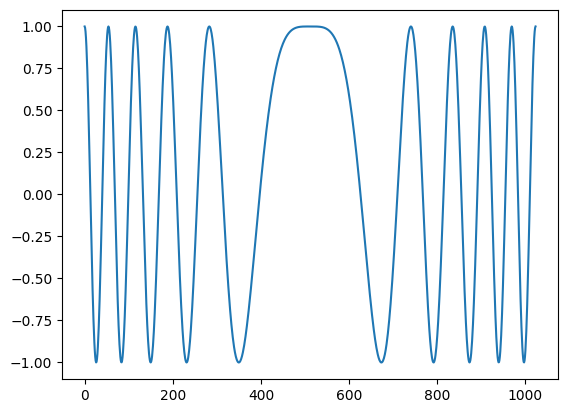

In [5]:
plt.plot(st)
plt.show()

In [6]:
# Impulse response and matched filtering
Hf = fft(conj(st))
Si = fft(sr)
so = fftshift(ifft(Si * Hf))

C:\Users\radug\AppData\Local\Temp\ipykernel_20224\3822503197.py:2: DeprecationWarning: scipy.conj is deprecated and will be removed in SciPy 2.0.0, use numpy.conj instead
  Hf = fft(conj(st))


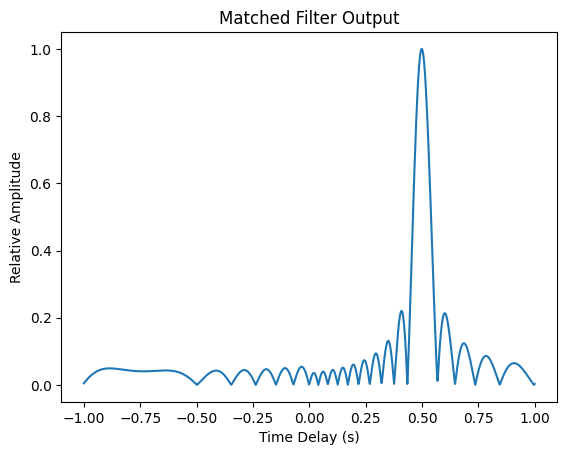

In [7]:
# Plot the matched filter output
plt.figure(1)
plt.plot(t, abs(so) / max(abs(so)))
plt.title('Matched Filter Output')
plt.xlabel('Time Delay (s)')
plt.ylabel('Relative Amplitude')
plt.show()

# Let's add noise

In [8]:
def generate_signal(delay):
    
    t = linspace(-1, 1 , 1024) # Pulsewidth (s)
    t0 = delay # Time delay to the target (s)

    # Set up the transmit and receive signals (s)
    st = exp(1j * 10 * pi * t ** 2)
    sr = exp(1j * 10 * pi * (t - t0) ** 2)
    
    return st, sr, t

In [9]:
def generate_noise(n, low, high):
    return (high - low) * np.random.random_sample(n) + low

In [10]:
def  match_filter(st, sr, noise = 0):
    Hf = fft(conj(st))
    # add noise to echoed signal
    Si = fft(sr + noise)
    so = fftshift(ifft(Si * Hf))
    return so

C:\Users\radug\AppData\Local\Temp\ipykernel_20224\3485319032.py:3: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  t = linspace(-1, 1 , 1024) # Pulsewidth (s)
C:\Users\radug\AppData\Local\Temp\ipykernel_20224\3485319032.py:7: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  st = exp(1j * 10 * pi * t ** 2)
C:\Users\radug\AppData\Local\Temp\ipykernel_20224\3485319032.py:8: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  sr = exp(1j * 10 * pi * (t - t0) ** 2)
C:\Users\radug\AppData\Local\Temp\ipykernel_20224\1193951155.py:2: DeprecationWarning: scipy.conj is deprecated and will be removed in SciPy 2.0.0, use numpy.conj instead
  Hf = fft(conj(st))
C:\Users\radug\AppData\Local\Temp\ipykernel_20224\502541493.py:21: RuntimeWarning: divide by zero encountered in cdouble_scalars
  snr = 10 * np.log10(signal_power / nois

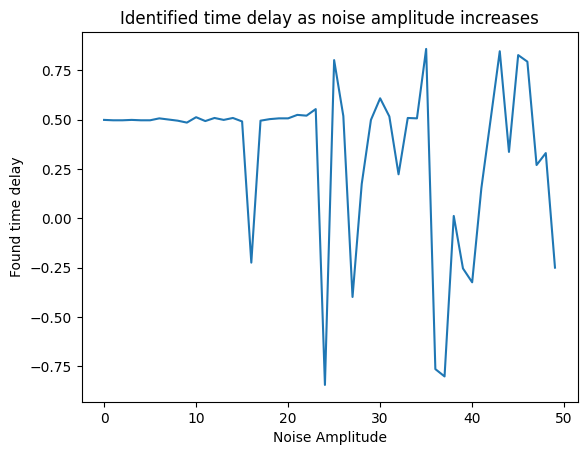

In [27]:
# Generate noise of higher and higher amplitudes and see where the target is no longer detectable
values = []
snrs = []
max_n = 50
for noise_amplitude in range(0, max_n): 
    # generate signal and noise
    st, sr, t = generate_signal(0.5)
    noise = generate_noise(1024, -noise_amplitude, noise_amplitude)
    
    # apply filter
    result = match_filter(st, sr, noise)
    
    # find time delay
    val = np.argmax(abs(result) / max(abs(result)))
    val = -1 + (2/1024) * val
    values.append(val)
    
    # compute signal to noise ratio
    
    signal_power = np.square(st).mean()
    noise_power = np.square(noise).mean()
    snr = 10 * np.log10(signal_power / noise_power)
    snrs.append(snr)
plt.plot(np.arange(max_n), values)
plt.title('Identified time delay as noise amplitude increases')
plt.xlabel('Noise Amplitude')
plt.ylabel('Found time delay')
plt.show()

The target is no longer identifiable when the noise amplitude reaches 15-20 times the relative amplitude of the transmitted signal. This corresposnds to a SNR of around -30. This is much more noise power than I expected. Is this right?

In [26]:
snrs[20]

(-30.989716790383035+3.157443512279336j)

# Identifying targets at different ranges and radar cross-sections

In [28]:
bandwidth = 30e6

pulsewidth = 10e-6

target_range = [10.0, 50.0, 100.0]

target_rcs = [1.0, 3.0, 2.0]

In [29]:
# is this sample rate? not clear
N = int(2 * bandwidth * pulsewidth) * 8

In [30]:
t = linspace(-0.5 * pulsewidth, 0.5 * pulsewidth, N)

C:\Users\radug\AppData\Local\Temp\ipykernel_20224\1092410614.py:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  t = linspace(-0.5 * pulsewidth, 0.5 * pulsewidth, N)


In [36]:
s = zeros(N, dtype=complex)


# Chirp slope

alpha = 0.5 * bandwidth / pulsewidth



# Loop over all the targets

for r, rcs in zip(target_range, target_rcs):

    s += sqrt(rcs) * exp(1j * 2.0 * pi * alpha * (t - 2.0 * r / c) ** 2)

In [37]:
st = exp(1j * 2 * pi * alpha * t ** 2)

In [39]:
Hf = fft(conj(st))

Si = fft(s)

so = fftshift(ifft(Si * Hf))

In [40]:
range_window = linspace(-0.25 * c * pulsewidth, 0.25 * c * pulsewidth, N)


C:\Users\radug\AppData\Local\Temp\ipykernel_20224\1565690763.py:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  range_window = linspace(-0.25 * c * pulsewidth, 0.25 * c * pulsewidth, N)


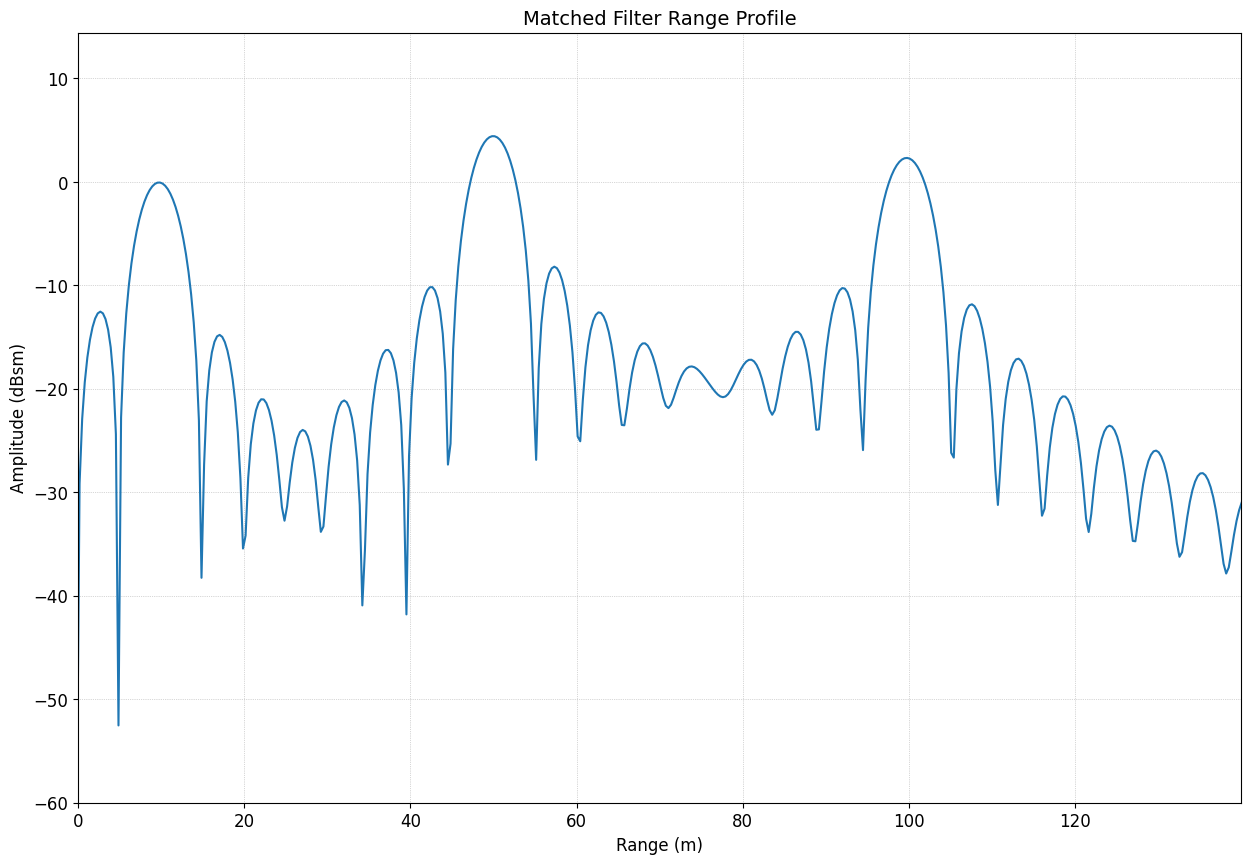

In [44]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Create the line plot

plt.plot(range_window, 20.0 * np.log10(abs(so) / N + np.finfo(float).eps), '')

plt.xlim(0, max(target_range) +  4 * c / bandwidth)

plt.ylim(-60, max( 20.0 * np.log10(abs(so) / N)) + 10)



# Set the x and y axis labels

plt.xlabel("Range (m)", size=12)

plt.ylabel("Amplitude (dBsm)", size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Set the plot title and labels

plt.title('Matched Filter Range Profile', size=14)



# Set the tick label size

plt.tick_params(labelsize=12)